In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [127]:
train = pd.read_csv("Data/train.csv").drop(columns="Unnamed: 0")
test = pd.read_csv("Data/test.csv").drop(columns="Unnamed: 0")
train.head()

,date,905270,921795,904261,905261,916328,923024,936365,902355,912215,...,9889RL,69568X,543755,77463M,29235J,131745,69487D,68157P,9110RA,292703
0,1990-01-02,22.75,12.63,30.00,29.61,3.8736,11.00,4.1250,24.50,58.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-01-03,22.56,12.57,31.50,29.37,3.8876,11.00,4.0000,24.50,57.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1990-01-04,22.38,12.41,32.25,28.89,3.8806,11.38,3.9375,24.63,57.88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1990-01-05,21.81,12.60,32.13,28.41,3.8387,11.50,3.8125,24.75,57.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1990-01-08,22.25,12.49,32.13,29.13,3.8387,11.50,3.8125,25.00,57.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
train["date"] = pd.to_datetime(train["date"], format="%Y-%m-%d")
test["date"] = pd.to_datetime(test["date"], format="%Y-%m-%d")

In [129]:
# Running linear regression on a sample stock

sample = train[["date", "936365"]]
sample["936365_lag1"] = train["936365"].shift(-1)
sample

,date,936365,936365_lag1
0,1990-01-02,4.1250,4.0000
1,1990-01-03,4.0000,3.9375
2,1990-01-04,3.9375,3.8125
3,1990-01-05,3.8125,3.8125
4,1990-01-08,3.8125,3.8750
...,...,...,...
6326,2015-02-09,3.0400,3.0400
6327,2015-02-10,3.0400,3.0700
6328,2015-02-11,3.0700,3.1200
6329,2015-02-12,3.1200,3.1500


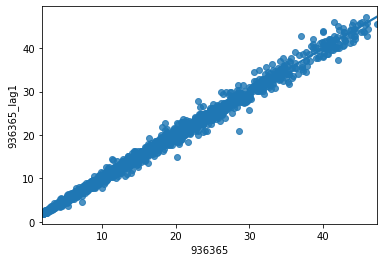

In [130]:
sns.regplot(data=sample, x="936365", y="936365_lag1")

In [131]:
sample["936365"].isna().value_counts()

False    6331
Name: 936365, dtype: int64

In [132]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
lag = 1
new_df = sample.iloc[:-1, :]
model.fit(X=new_df[["936365"]], y=new_df["936365_lag1"])

LinearRegression()

In [133]:
print("Line formula for 936365: \ncurrent price = " + str(model.intercept_) + " + " +
      str(model.coef_[0]) + " * prev price")

Line formula for 936365: 
current price = 0.028297530216166322 + 0.9974971975060474 * prev price


In [134]:
# Predicting for a single stock
import datetime

total_predictions = pd.DataFrame()

next_days = 10
lag = 1
stock_predictions = []
for day in range(next_days):
    model = LinearRegression()
    new_df = sample.iloc[:-1, :]
    model.fit(X=new_df[["936365"]], y=new_df["936365_lag1"])
    current_price = sample[["936365"]].iloc[-1][0]
    next_pred = model.predict(pd.DataFrame([[current_price]]))[0]
    next_day = sample[["date"]].iloc[-1][0] + datetime.timedelta(days=1)
    sample["936365_lag1"].fillna(next_pred, inplace=True)
    sample = sample.append(pd.DataFrame({"date": [next_day], 
                                         "936365": [next_pred], 
                                         "936365_lag1": [np.nan]})).reset_index(drop=True)
    stock_predictions.append(next_pred)
    
total_predictions["936365"] = stock_predictions
total_predictions

,936365
0,3.170414
1,3.190776
2,3.211088
3,3.231349
4,3.251559
5,3.271718
6,3.291827
7,3.311886
8,3.331895
9,3.351853


In [135]:
# Running predictions for all stocks
for stock in train.columns[1:]:
    print(stock)

905270
921795
904261
905261
916328
923024
936365
902355
912215
929813
905271
921246
923116
952192
905113
912145
905339
951022
905802
906190
905425
906156
912201
921249
906151
916305
921917
945383
905420
992814
912059
992816
921093
902337
901646
905342
904272
702259
912669
921161
905793
921431
932060
905175
904332
951043
923937
902173
902238
905592
930857
905384
905439
916365
905876
945385
912125
906402
902338
923643
905147
905596
904818
905491
912199
905343
905080
905685
921334
912216
916109
921436
916098
904825
912278
907737
945551
902257
993189
912635
912151
905075
921807
902255
902224
916604
906182
905479
912909
906839
906196
902242
905024
904803
916790
912455
902245
912060
916125
916407
904282
906148
902198
981550
916944
998326
916091
929814
749321
902288
905140
902289
906018
912568
905997
912273
923709
903705
906899
932188
912188
905966
951020
938424
905214
912646
932136
930531
906189
912595
916704
902351
916382
923731
944314
905047
904830
905114
905706
902227
902199
904383
905139